Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.758


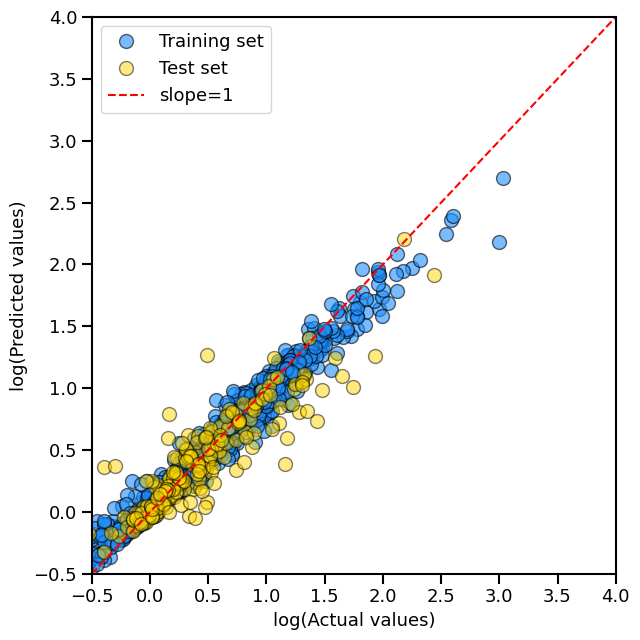

Training set score (R^2): 0.97
Test set score (R^2): 0.78
Pearson correlation coefficient (train): PearsonRResult(statistic=0.9865770379112865, pvalue=0.0)
Pearson correlation coefficient (test): PearsonRResult(statistic=0.8930337436819702, pvalue=4.120230881922489e-67)


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import joblib

# Load datasets
df1 = pd.read_csv('feature.csv', sep=',')
df2 = pd.read_json('target.json')

# Replace NaN and infinity values with zero
dfX = df1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
dfy = df2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# Define features (X) and target (y)
X = dfX
y1 = dfy['kL'].values
y = np.log10(y1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 13, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor and GridSearchCV
forestr = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(forestr, param_grid, cv=10, n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from GridSearchCV
print("Best parameters found: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Train RandomForestRegressor with the best parameters found by GridSearchCV
best_forestr = RandomForestRegressor(**grid_search.best_params_, random_state=1)
best_forestr.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(best_forestr, 'FinalKLModel.joblib')

# Predicting and Evaluating the Model
y_train_pred = best_forestr.predict(X_train)
y_test_pred = best_forestr.predict(X_test)

# Pearson correlation coefficient for the training and test sets
pearson_corr_train = pearsonr(y_train_pred, y_train)
pearson_corr_test = pearsonr(y_test_pred, y_test)

# Plot predicted values vs. actual values
plt.figure(figsize=(6.5, 6.5))

# Plot for training set
plt.plot(y_train, y_train_pred, 'o', markersize=10, color='dodgerblue', mec='k', alpha=0.6, label='Training set')

# Plot for test set
plt.plot(y_test, y_test_pred, 'o', markersize=10, color='gold', mec='k', alpha=0.5, label='Test set')

# Plot y=x line
xx = np.linspace(-0.5, 4, 1000)
plt.plot(xx, xx, '--r', linewidth=1.5, label='slope=1')

plt.legend(loc='upper left', fontsize=13)
plt.xlabel('log(Actual values)', fontsize=13)
plt.ylabel('log(Predicted values)', fontsize=13)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)

# Formatting plot appearance
ax = plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
plt.tick_params(axis='both', width=1.5, length=7, labelsize=13)
plt.tight_layout()

# Save the plot as an image file
plt.savefig("FinalKLModel_EvaluationPlot.png")

# Show the plot
plt.show()

# Print model evaluation metrics
print("Training set score (R^2): {:.2f}".format(best_forestr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(best_forestr.score(X_test, y_test)))
print("Pearson correlation coefficient (train):", pearson_corr_train)
print("Pearson correlation coefficient (test):", pearson_corr_test)
